<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/ml09_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# 이진 분류(Binary class classification)

Breast cancer 데이터셋에서 악성종양(malignant)과 양성종양(benign)을 분류

## 데이터셋 준비

In [2]:
cancer = datasets.load_breast_cancer()  #> Bunch 클래스 타입 - Python의 dict를 가지고 있는 객체

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(cancer.DESCR)  # cancer['DESCR']

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
cancer.feature_names  # cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
X = cancer.data  # 특성 배열
y = cancer.target  # 타겟 배열

In [8]:
X.shape  #> (samples, features)

(569, 30)

In [9]:
y.shape  #> (samples,)

(569,)

In [11]:
X[:3, :]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [12]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
y[-10:]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

## 데이터 탐색(EDA, Exploratory Data Analysis)

In [14]:
cancer_df = pd.DataFrame(data=X, columns=cancer.feature_names)

In [15]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
# 암 데이터프레임에 target 파생변수를 추가
cancer_df['target'] = cancer.target

In [19]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
# target(클래스)의 빈도수
np.unique(cancer_df.target, return_counts=True)
#> 암(malignant) -> 0, 종양(benign) -> 1

(array([0, 1]), array([212, 357]))

In [22]:
# target 변수의 값들을 0 -> 'malignant', 1 -> 'benign'으로 변환
cancer_df.target = np.where(cancer_df.target == 0, 'malignant', 'benign')

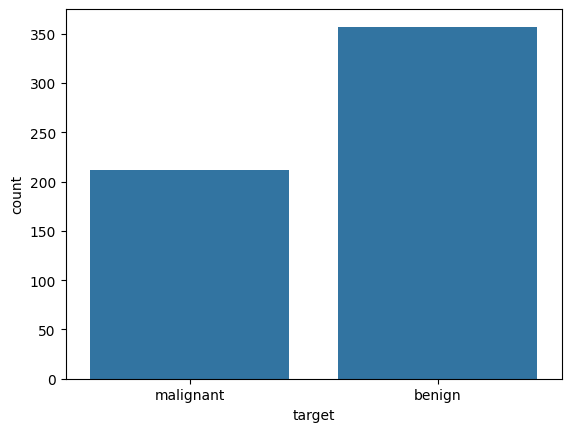

In [23]:
sns.countplot(data=cancer_df, x='target')
plt.show()

첫 5개 변수('mean radius' ~ 'mean smoothness')의 히스토그램을 그려보세요.

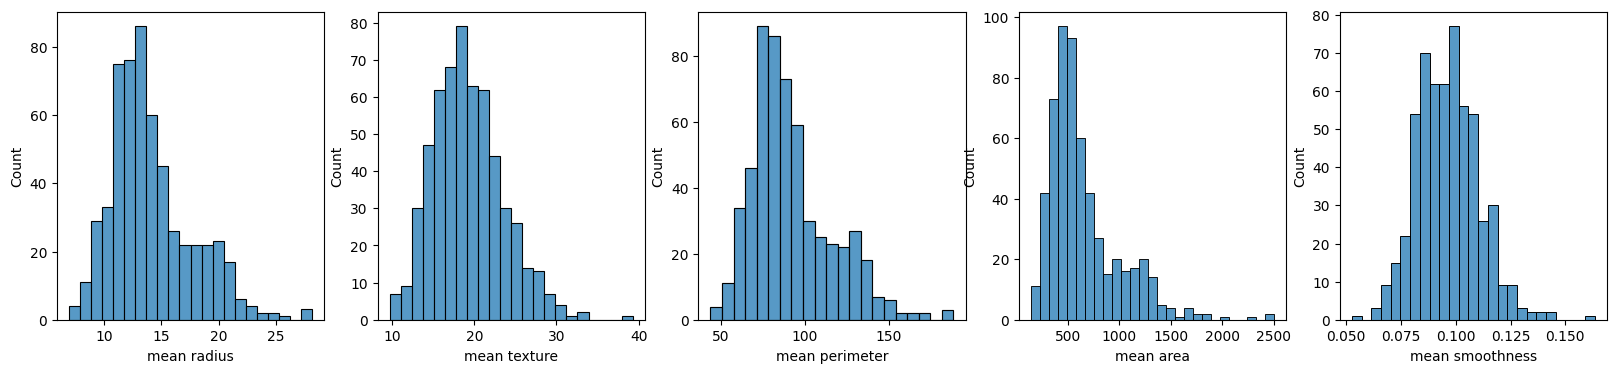

In [32]:
fig, axes = plt.subplots(ncols=5, figsize=(20, 4))

for i, col in enumerate(cancer_df.columns[:5]):
    sns.histplot(data=cancer_df, x=col, ax=axes[i])

plt.show()

첫 5개 변수('mean radius' ~ 'mean smoothness')의 pairplot(hue='target')을 그려보세요.

In [33]:
sub_df = cancer_df.iloc[:, [0, 1, 2, 3, 4, 30]]

In [34]:
sub_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,target
0,17.99,10.38,122.80,1001.0,0.11840,malignant
1,20.57,17.77,132.90,1326.0,0.08474,malignant
2,19.69,21.25,130.00,1203.0,0.10960,malignant
3,11.42,20.38,77.58,386.1,0.14250,malignant
4,20.29,14.34,135.10,1297.0,0.10030,malignant


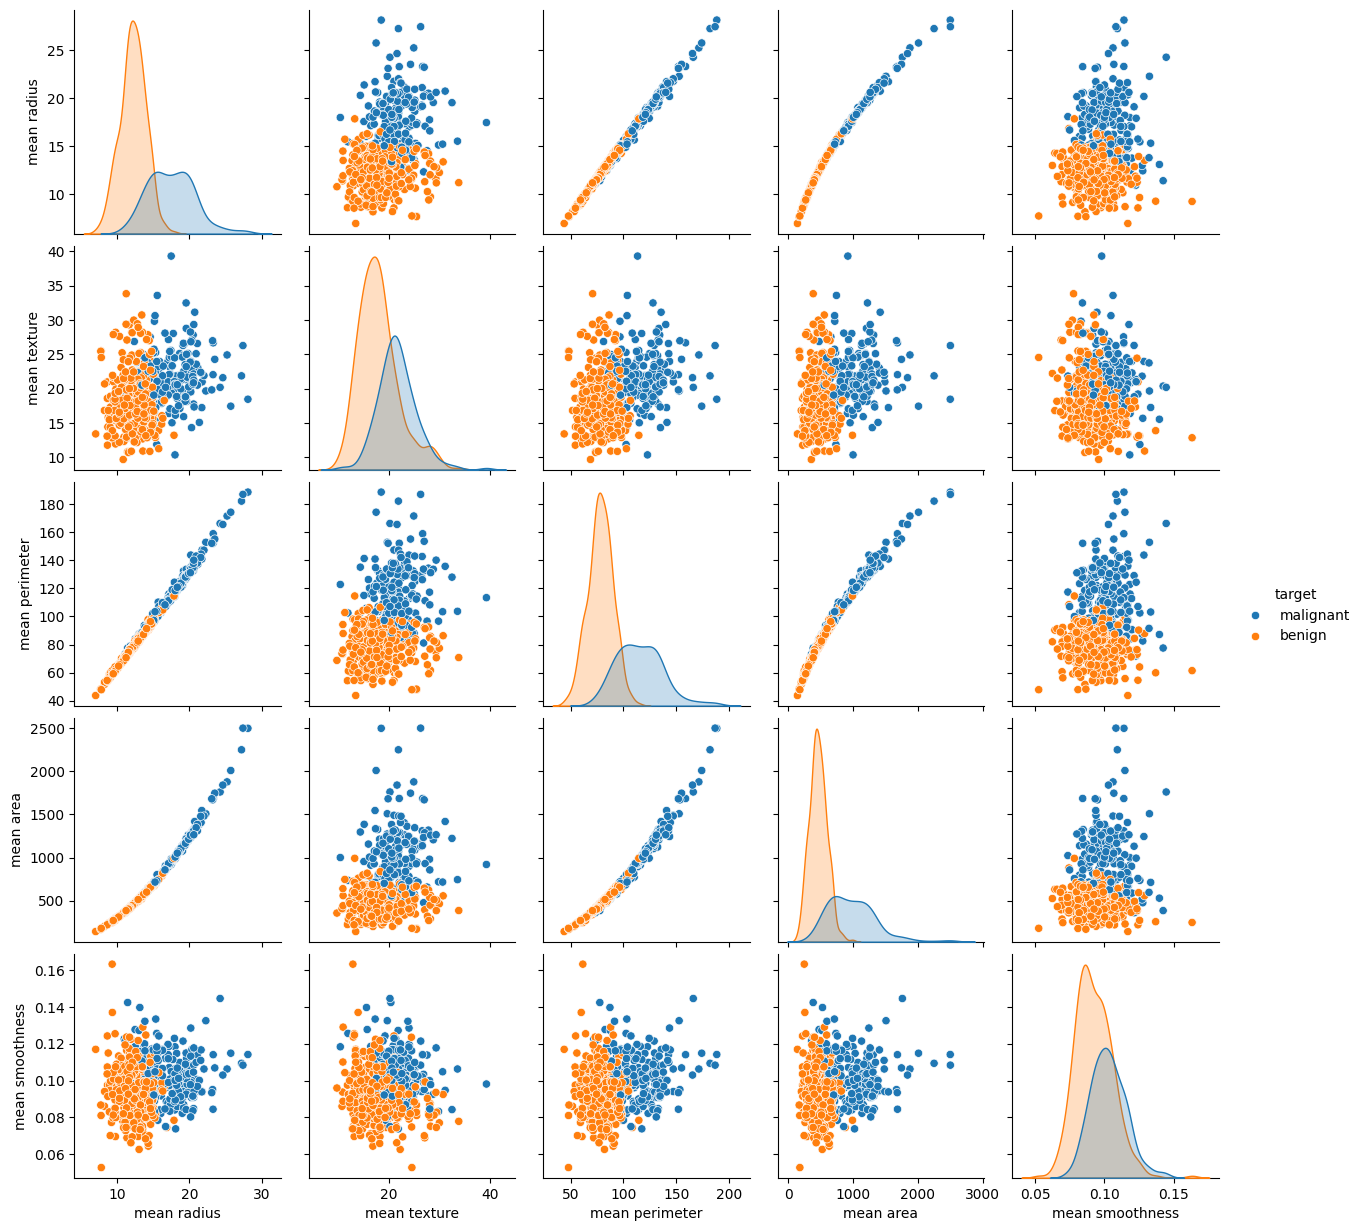

In [35]:
sns.pairplot(data=sub_df, hue='target')
plt.show()

## 훈련 셋/테스트 셋 나누기

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
X_train.shape

(455, 30)

In [38]:
X_test.shape

(114, 30)

In [39]:
y_train.shape

(455,)

In [40]:
y_test.shape

(114,)

## KNN Classifier

In [41]:
# 분류기 ML 모델 생성
knn = Pipeline(steps=[('scaler', StandardScaler()),
                      ('clf', KNeighborsClassifier())])

In [42]:
knn.fit(X_train, y_train)  # 모델 훈련

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [43]:
train_pred = knn.predict(X_train)  # 훈련 셋의 예측값

In [44]:
conf_mat = confusion_matrix(y_train, train_pred)  # 혼동행렬(오차행렬)
conf_mat

array([[161,   9],
       [  3, 282]])

seaborn 패키지의 heatmap 함수를 사용해서 혼동행렬을 시각화해보세요.

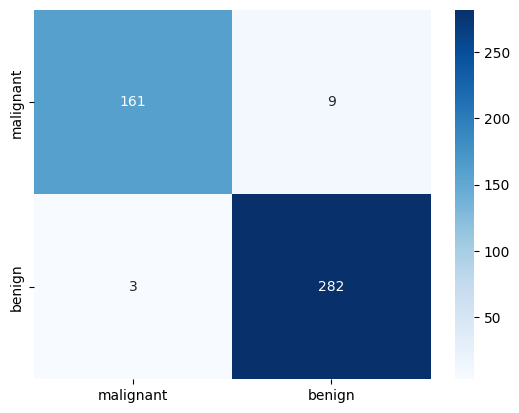

In [50]:
sns.heatmap(data=conf_mat, cmap='Blues', annot=True, fmt='d',
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.show()

In [45]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       170
           1       0.97      0.99      0.98       285

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [54]:
# 테스트 셋의 예측값
test_pred = knn.predict(X_test)

In [55]:
conf_mat_test = confusion_matrix(y_test, test_pred)
conf_mat_test

array([[39,  3],
       [ 2, 70]])

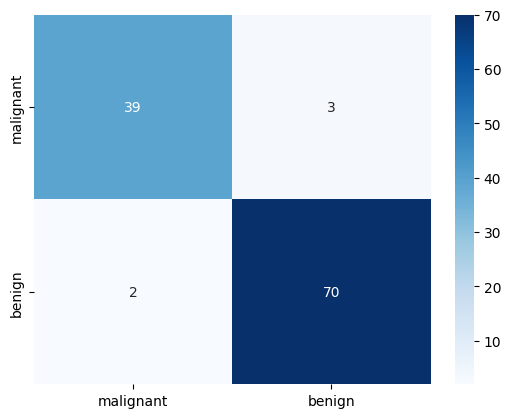

In [57]:
sns.heatmap(data=conf_mat_test, cmap='Blues', annot=True, fmt='d',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.show()

In [58]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## precision(정밀도)-recall(재현율) 곡선

*   정밀도(precision)와 재현율(recall)은 trade-off 관계가 있음.
    *   같은 정확도(accuracy)에서 정밀도가 좋아지면 재현율이 나빠지고, 재현율이 좋아지면 정밀도가 나빠짐.
*   정밀도를 y축으로, 재현율을 x축으로 설정해서 trade-off 관계를 나타낸 그래프.

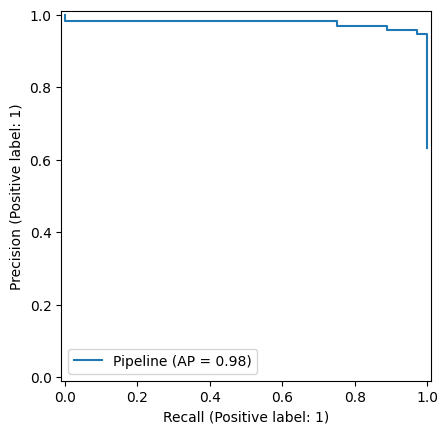

In [65]:
PrecisionRecallDisplay.from_estimator(knn, X_test, y_test)
plt.show()

## ROC(Receiver Operating Characteristic) 곡선

*   FPR을 x축으로 하고, TPR을 y축으로 설정해서 FPR과 TPR 사이의 관계를 나타낸 곡선.
*   FPR(False Positive Rate, 가짜 양성 비율): 실제 음성 샘플들 중에서 오답(가짜 양성)의 비율.
    *   FPR = FP / (FP + TN)
*   TPR(True Positive Rate, 진짜 양성 비율): 실제 양성 샘플들 중에서 정답(진짜 양성)의 비율. 재현율(recall).
    *   TPR = TP / (TP + FN)
*   TNR(True Negative Rate, 진짜 음성 비율): 실제 음성 샘플들 중에서 정답(진짜 음성)의 비율. 특이도(specificity).
    *   TNR = TN / (FP + TN)
    *   TNR + FPR = 1
    *   TNR = 1 - FPR
    *   FPR = 1 - TNR
*   AUC(Area under curve): ROC 곡선 아래쪽의 넓이.
    *   이진 분류 성능 평가 - AUC가 1에 가까울 수록 좋은 모델.

---

<table>
    <thead>
        <tr>
            <th></th>
            <th></th>
            <th colspan="2">예측값<th/>
        </tr>
        <tr>
            <th></th>
            <th></th>
            <th>P</th>
            <th>N</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th rowspan="2">실젯값</th>
            <th>P</th>
            <td>TP</td>
            <td>FN</td>
        </tr>
        <tr>
            <th>N</th>
            <td>FP</td>
            <td>TN</td>
        </tr>
    </tbody>
</table>

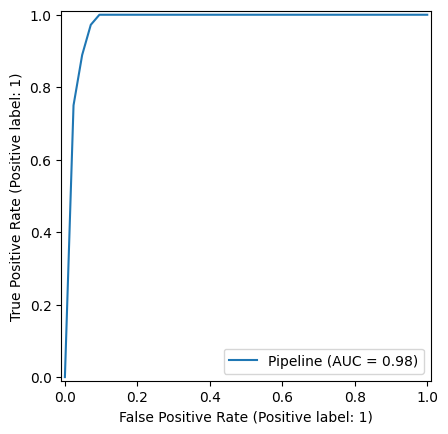

In [66]:
RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.show()

## Logistic Regression

In [67]:
logit = Pipeline(steps=[('scaler', StandardScaler()),
                        ('clf', LogisticRegression(random_state=42))])  # ML 모델 생성

In [68]:
logit.fit(X_train, y_train)  # ML 모델 훈련

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=42))])

In [69]:
train_pred = logit.predict(X_train)  # 훈련 셋 예측값

In [70]:
conf_mat_train = confusion_matrix(y_train, train_pred)
conf_mat_train

array([[166,   4],
       [  1, 284]])

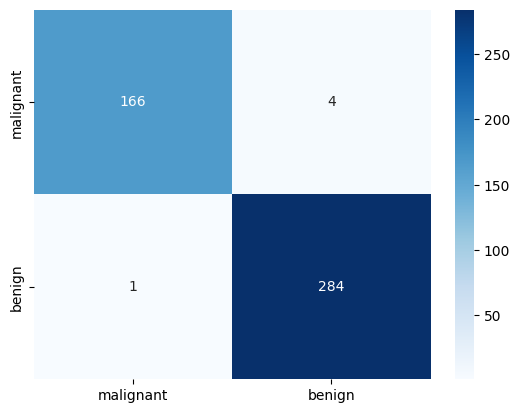

In [76]:
sns.heatmap(data=conf_mat_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.show()

In [71]:
print(classification_report(y_train, train_pred))
# KNN 보다 훈련 결과가 좋음.

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       170
           1       0.99      1.00      0.99       285

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [72]:
test_pred = logit.predict(X_test)  # 테스트 셋 예측값

In [73]:
conf_mat_test = confusion_matrix(y_test, test_pred)
conf_mat_test

array([[41,  1],
       [ 1, 71]])

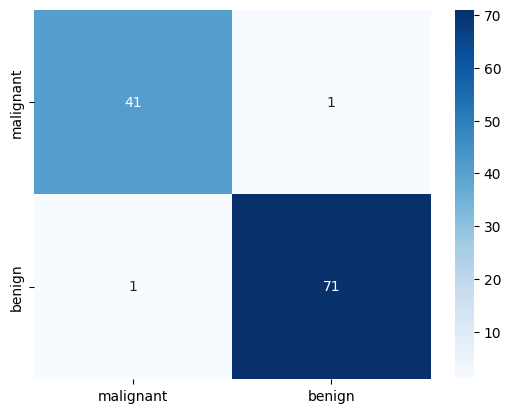

In [78]:
sns.heatmap(data=conf_mat_test, cmap='Blues', annot=True, fmt='d',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.show()

In [74]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



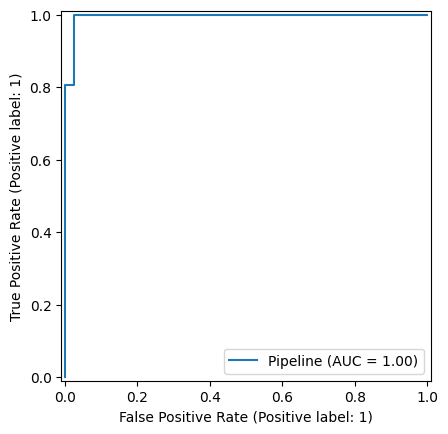

In [75]:
# 테스트 셋에서의 ROC 곡선
RocCurveDisplay.from_estimator(logit, X_test, y_test)
plt.show()

## SGD Classifier

In [79]:
sgd = Pipeline(steps=[('scaler', StandardScaler()),
                      ('clf', SGDClassifier(random_state=42))])

In [80]:
sgd.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SGDClassifier(random_state=42))])

In [81]:
train_pred = sgd.predict(X_train)

In [82]:
conf_mat_train = confusion_matrix(y_train, train_pred)
conf_mat_train

array([[165,   5],
       [  3, 282]])

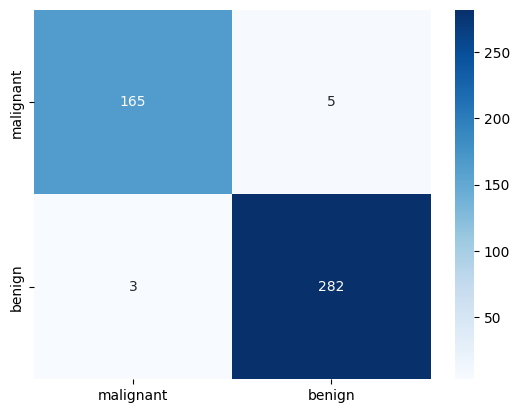

In [83]:
sns.heatmap(data=conf_mat_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.show()

In [84]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       170
           1       0.98      0.99      0.99       285

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [85]:
test_pred = sgd.predict(X_test)

In [86]:
conf_mat_test = confusion_matrix(y_test, test_pred)
conf_mat_test

array([[41,  1],
       [ 3, 69]])

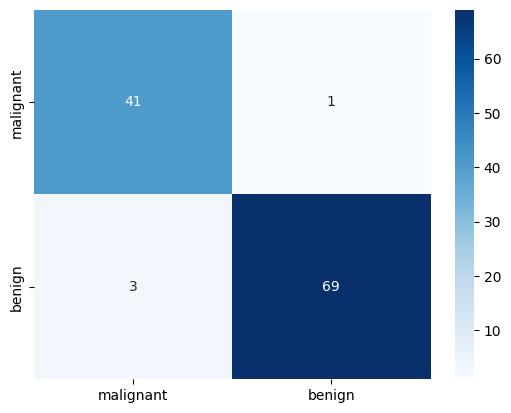

In [87]:
sns.heatmap(data=conf_mat_test, cmap='Blues', annot=True, fmt='d',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.show()

In [88]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



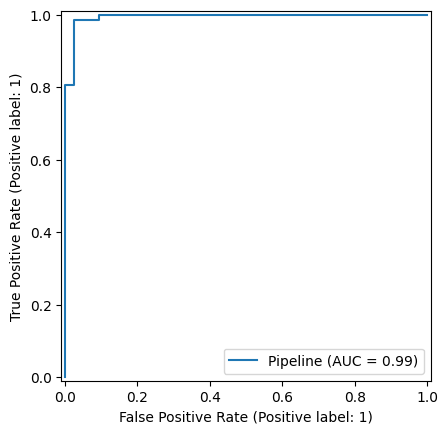

In [89]:
RocCurveDisplay.from_estimator(sgd, X_test, y_test)
plt.show()

# 다중 클래스 분류(multi-class classification)

Iris(붓꽃) 데이터셋에서 setosa/versicolor/virginica 분류

## 데이터 준비

In [90]:
iris = datasets.load_iris(as_frame=True)

In [91]:
iris_df = iris.frame

In [92]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


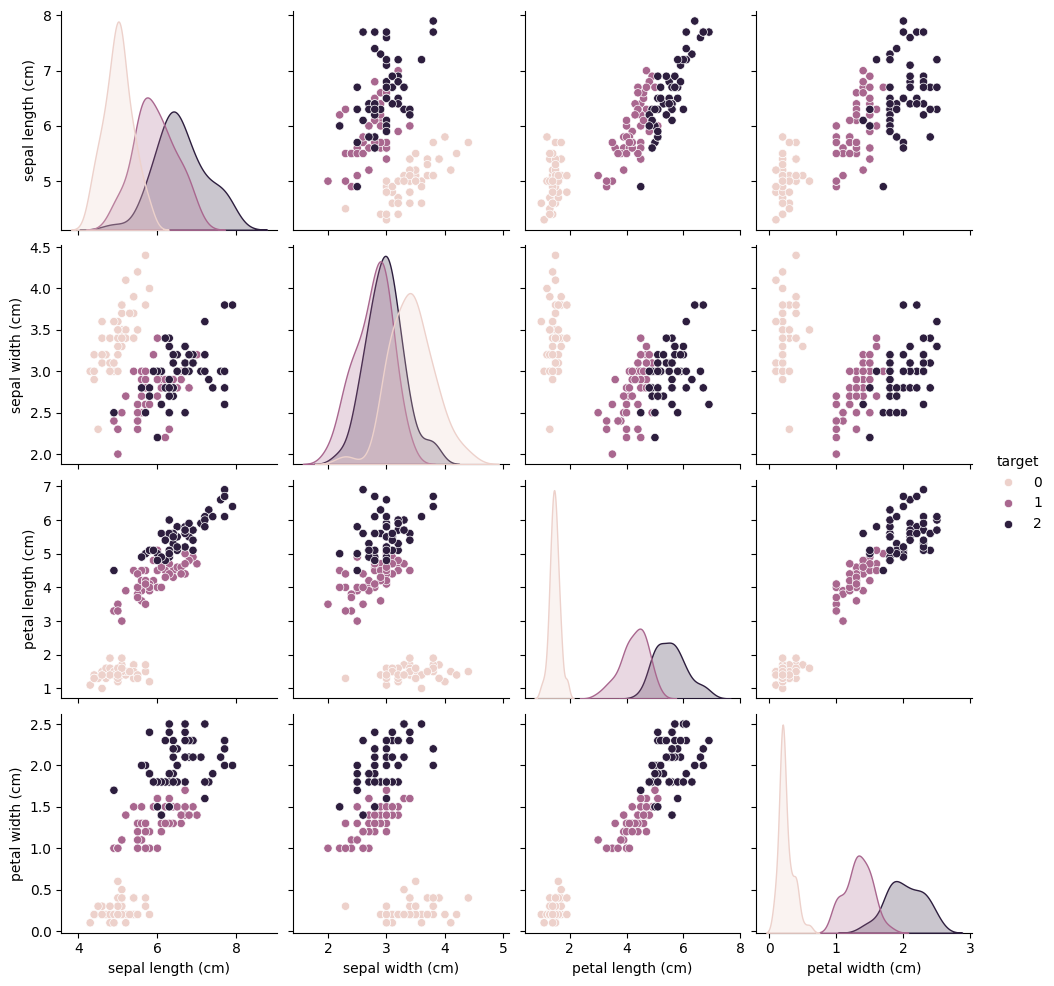

In [93]:
sns.pairplot(data=iris_df, hue='target')
plt.show()

In [96]:
X = iris.data.values  # 특성 배열
y = iris.target.values  # 타겟 배열

In [99]:
# 훈련 셋/테스트 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## KNN Classifier

In [101]:
knn = Pipeline(steps=[('scaler', StandardScaler()),
                      ('clf', KNeighborsClassifier())])

In [102]:
knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [103]:
train_pred = knn.predict(X_train)

In [105]:
cm_train = confusion_matrix(y_train, train_pred)

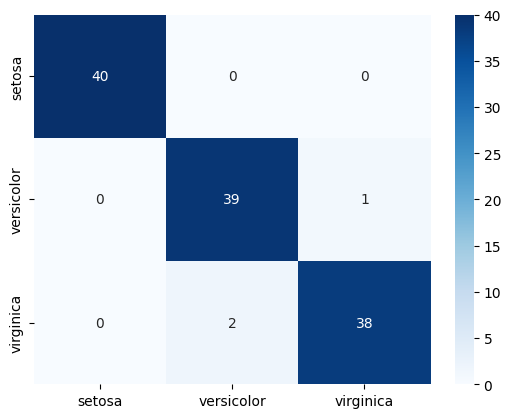

In [108]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

In [107]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.97      0.96        40
           2       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [109]:
test_pred = knn.predict(X_test)

In [110]:
cm_test = confusion_matrix(y_test, test_pred)

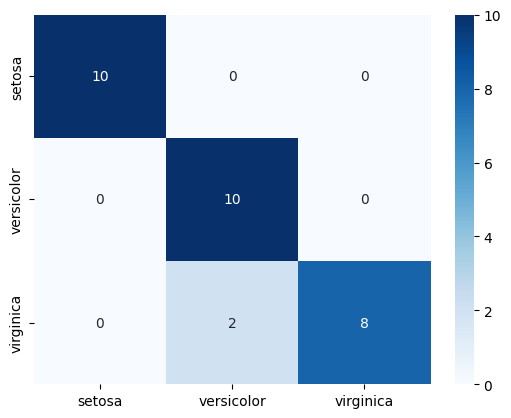

In [111]:
sns.heatmap(data=cm_test, cmap='Blues', annot=True, fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

In [112]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



## Logistic Regression

In [114]:
logit = Pipeline(steps=[('scaler', StandardScaler()),
                        ('clf', LogisticRegression())])

In [115]:
logit.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [116]:
train_pred = logit.predict(X_train)

In [117]:
cm_train = confusion_matrix(y_train, train_pred)

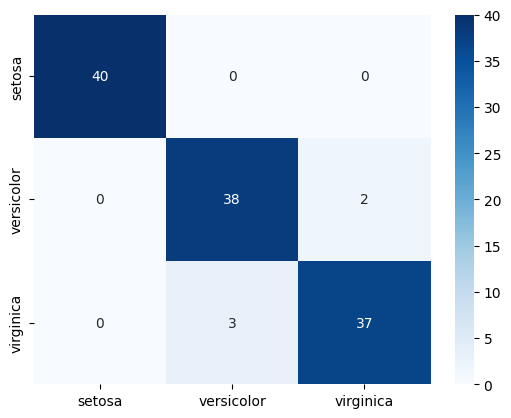

In [118]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

In [119]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.95      0.94        40
           2       0.95      0.93      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [120]:
test_pred = logit.predict(X_test)

In [121]:
cm_test = confusion_matrix(y_test, test_pred)

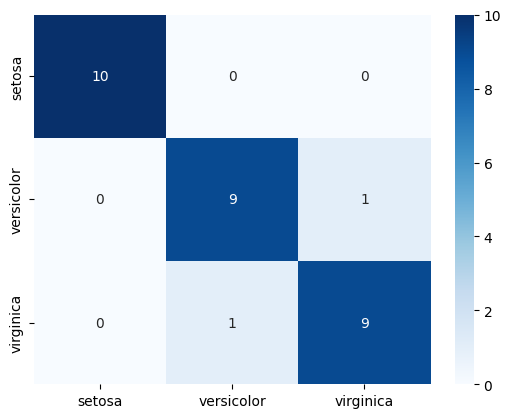

In [122]:
sns.heatmap(data=cm_test, cmap='Blues', annot=True, fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

In [123]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## SGD Classifier

In [124]:
sgd = Pipeline(steps=[('scaler', StandardScaler()),
                      ('clf', SGDClassifier())])

In [125]:
sgd.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', SGDClassifier())])

In [126]:
train_pred = sgd.predict(X_train)

In [127]:
cm_train = confusion_matrix(y_train, train_pred)

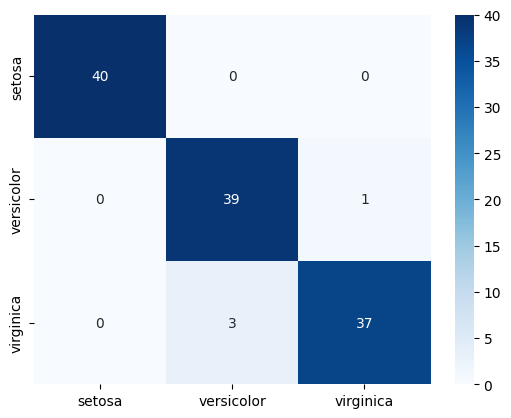

In [128]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

In [132]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.97      0.95        40
           2       0.97      0.93      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [129]:
test_pred = sgd.predict(X_test)

In [130]:
cm_test = confusion_matrix(y_test, test_pred)

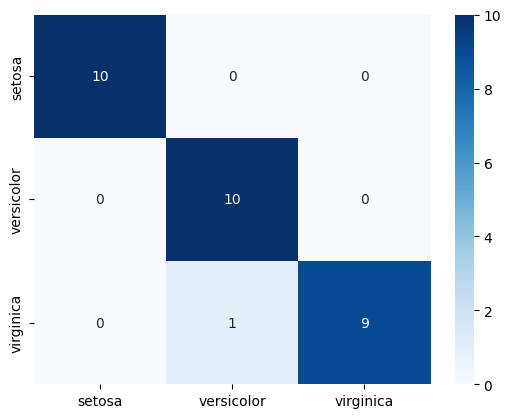

In [131]:
sns.heatmap(data=cm_test, cmap='Blues', annot=True, fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

In [133]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## SVM Classifier

In [134]:
from sklearn.svm import SVC

In [135]:
svc = Pipeline(steps=[('scaler', StandardScaler()),
                      ('clf', SVC())])

In [136]:
svc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC())])

In [137]:
train_pred = svc.predict(X_train)

In [138]:
cm_train = confusion_matrix(y_train, train_pred)

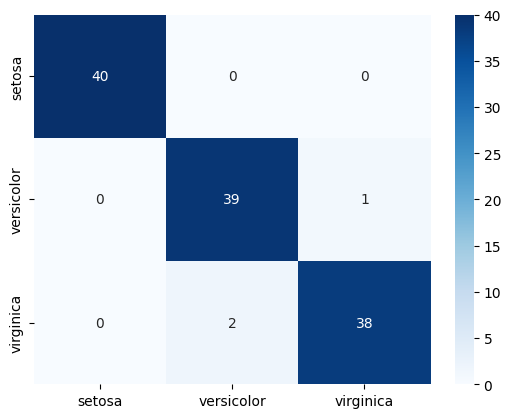

In [139]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

In [141]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.97      0.96        40
           2       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [142]:
test_pred = svc.predict(X_test)

In [143]:
cm_test = confusion_matrix(y_test, test_pred)

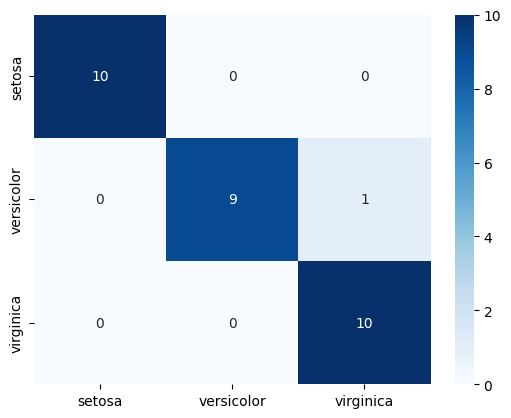

In [144]:
sns.heatmap(data=cm_test, cmap='Blues', annot=True, fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

In [145]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

